In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.notnull().sum()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

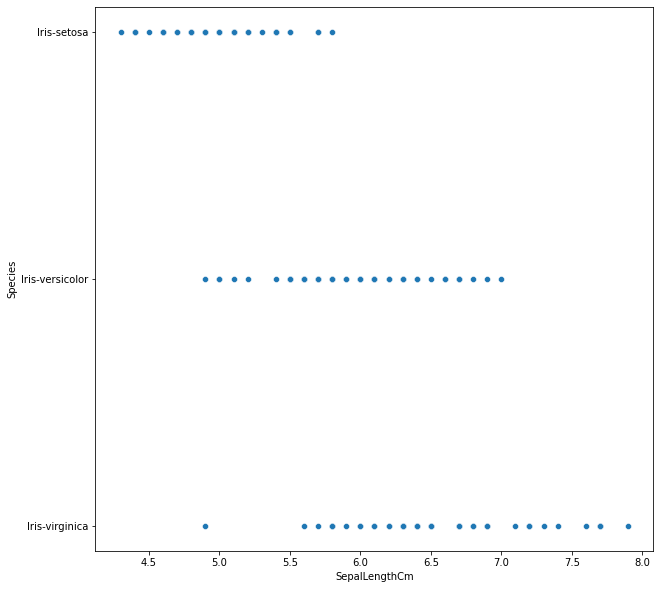

In [6]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=data['SepalLengthCm'], y = data['Species'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

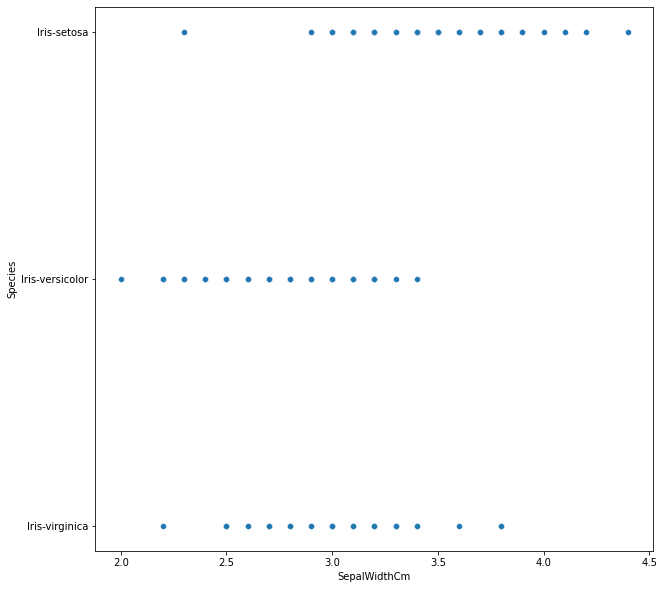

In [7]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=data['SepalWidthCm'], y = data['Species'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

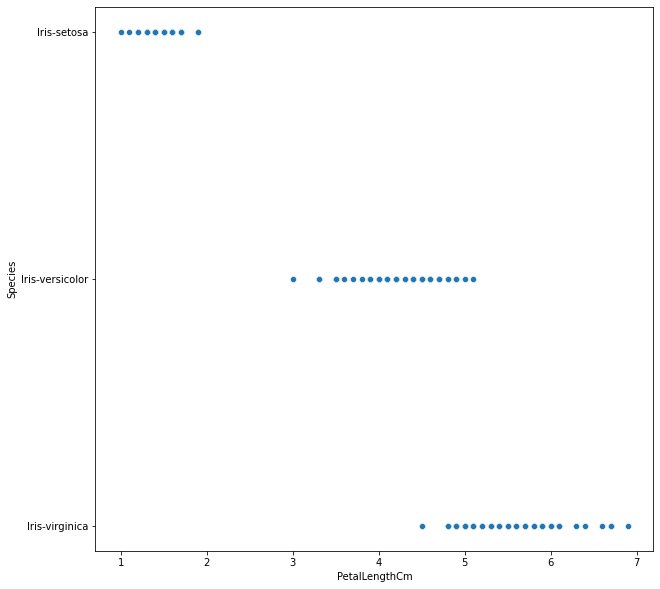

In [8]:
plt.figure(figsize = (10,10))
sns.scatterplot(x=data['PetalLengthCm'], y = data['Species'])

In [9]:
data.pop('Id')

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [13]:
x=data.iloc[:,:-1]
x.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y=data.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel ='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [25]:
y_pred= classifier.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [29]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)

In [30]:
accuracy

0.9777777777777777

In [31]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,2,3,7,15,25,45],'kernel':['linear']},
            {'C':[1,2,3,7,15,25,45],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6]}]
grid_search = GridSearchCV(estimator =classifier,
                          param_grid = parameters,
                          cv=10,
                          n_jobs=-1)
grid_search= grid_search.fit(x_train,y_train)

In [32]:
accuracy= grid_search.best_score_

In [33]:
accuracy

0.9709090909090909

In [34]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}